# Description

TBD.....

# Load Libraries

## Visualization / Heatmap Libraries

In [47]:
#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Dataframe and Math Function Libraries

In [48]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

# Load Data And Explore

## Google Download (eventually API)

https://takeout.google.com/

## Import

In [49]:
import os
filePath = 'c:\\Users\\igoej\\OneDrive\\Documents\\GitHub\\DataAnalytics\\Data\\2020-10-09 Daily Summaries.csv'
df_fit = pd.read_csv(filePath)
#df_fit.tail()

In [50]:
#df_fit.head()

In [51]:
#df_fit.info()

In [52]:
#df_fit.describe()

In [53]:
#df_fit.describe(include='object')

# Shared Functions

## Correlation

In [54]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [55]:
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates().dropna()
    return xFlattened


In [56]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

## Basic

In [57]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [58]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

# Data Clean and Prep

In [59]:
df_fit.dropna(axis=1, how='all', inplace=True)

## Google Specific

In [60]:
df_fit.set_index('Date')

,Calories (kcal),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average blood glucose (mmol/L),Max blood glucose (mmol/L),Min blood glucose (mmol/L),Blood glucose specimen source,Step count,...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05,2095.882061,40.742299,-73.976767,40.743303,-73.975535,7.089273,11.1,4.2,Interstitial fluid,4202.0,...,NaN,NaN,3840000.0,NaN,NaN,NaN,8340000.0,9780000.0,NaN,NaN
2020-10-06,2671.601990,40.743245,-73.976110,40.743306,-73.975978,7.346853,11.3,4.0,Interstitial fluid,5522.0,...,3102373.0,NaN,3780000.0,NaN,NaN,NaN,14940000.0,7320000.0,420000.0,NaN
2020-10-07,2824.278339,40.742628,-73.976140,40.743312,-73.974285,7.729111,14.5,4.2,Interstitial fluid,6710.0,...,3313976.0,NaN,15780000.0,NaN,NaN,NaN,7020000.0,5340000.0,420000.0,NaN


## Set Aggregate Values

In [61]:
df_fit['SleepSum'] = df_fit['Deep sleeping duration (ms)'] + df_fit['Light sleeping duration (ms)'] + df_fit['Sleep duration (ms)']
df_fit['sleepSumHours'] = df_fit['SleepSum'] / 3600000

In [62]:
df_fit['basketballMinutes'] = df_fit['Basketball duration (ms)'] / 60000
df_fit['rowingMachineMinutes'] = df_fit['Rowing machine duration (ms)']/ 60000

## Lag/Shift Values

In [63]:
df_fit['rowingMachineMinutesShifted'] = df_fit['rowingMachineMinutes'].shift()
df_fit['moveMinutesCountShifted'] = df_fit['Move Minutes count'].shift()
df_fit['heartPointsShifted'] = df_fit['Heart Points'].shift()
df_fit['distanceShifted'] = df_fit['Distance (m)'].shift()
df_fit['basketballMinutesShifted'] = df_fit['basketballMinutes'].shift()


In [64]:
df_fit.columns

Index(['Date', 'Calories (kcal)', 'Low latitude (deg)', 'Low longitude (deg)',
       'High latitude (deg)', 'High longitude (deg)',
       'Average blood glucose (mmol/L)', 'Max blood glucose (mmol/L)',
       'Min blood glucose (mmol/L)', 'Blood glucose specimen source',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Heart Points', 'Heart Minutes',
       'Average heart rate (bpm)', 'Max heart rate (bpm)',
       'Min heart rate (bpm)', 'Distance (m)', 'Average speed (m/s)',
       'Max speed (m/s)', 'Min speed (m/s)',
       'Average systolic blood pressure (mmHg)',
       'Max systolic blood pressure (mmHg)',
       'Min systolic blood pressure (mmHg)',
       'Average diastolic blood pressure (mmHg)',
       'Max diastolic blood pressure (mmHg)',
       'Min diastolic blood pressure (mmHg)', 'Move Minutes count',
       'Biking duration (ms)', 'Inactive duration (ms)',
       'Unknown duration (ms)', 'Walking duration (ms)',
       'Runni

# Create Correlation Heat Map and List

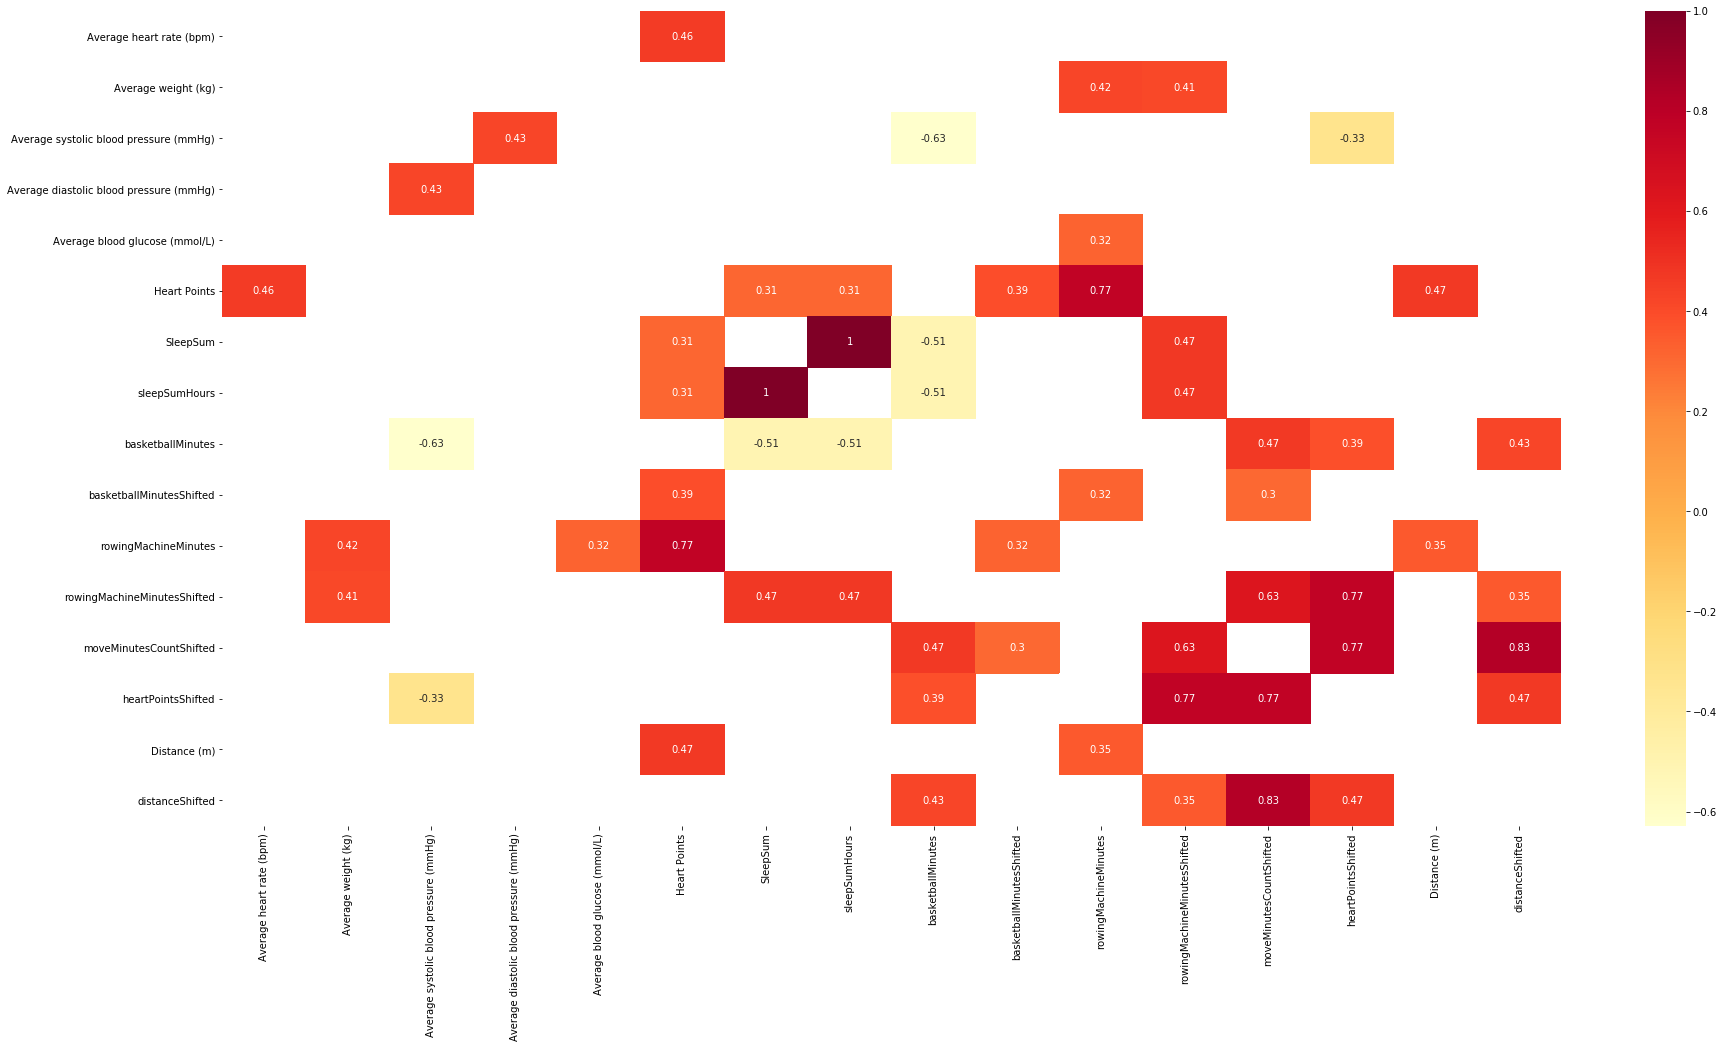

In [65]:
#set data set for analysis
df = df_fit[['Date', 'Average heart rate (bpm)','Average weight (kg)','Average systolic blood pressure (mmHg)','Average diastolic blood pressure (mmHg)','Average blood glucose (mmol/L)','Heart Points','SleepSum', 'sleepSumHours','basketballMinutes', 'basketballMinutesShifted', 'rowingMachineMinutes','rowingMachineMinutesShifted', 'moveMinutesCountShifted','heartPointsShifted','Distance (m)', 'distanceShifted']]
filterValue = 0.3
plt.figure(figsize=(30,15))
sns.heatmap(corrFilter(df, filterValue), annot=True, cmap="YlOrRd")
plt.show()

In [66]:
corr_fit_filtered = corrFilterFlattened(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

Average systolic blood pressure (mmHg)   basketballMinutes                        -0.628664
SleepSum                                 basketballMinutes                        -0.507087
basketballMinutes                        sleepSumHours                            -0.507087
Average systolic blood pressure (mmHg)   heartPointsShifted                       -0.331498
basketballMinutesShifted                 moveMinutesCountShifted                   0.302554
Heart Points                             SleepSum                                  0.308002
                                         sleepSumHours                             0.308002
basketballMinutesShifted                 rowingMachineMinutes                      0.321718
rowingMachineMinutes                     Average blood glucose (mmol/L)            0.323917
Distance (m)                             rowingMachineMinutes                      0.352992
basketballMinutes                        heartPointsShifted                     

# Measures

## Blood Pressure


In [67]:
filterForLabels(corr_fit_filtered, 'Average systolic blood pressure (mmHg)')

,Corr
basketballMinutes,-0.628664
heartPointsShifted,-0.331498
Average diastolic blood pressure (mmHg),0.426500


In [68]:
filterForLabels(corr_fit_filtered, 'Average diastolic blood pressure (mmHg)')

,Corr
Average systolic blood pressure (mmHg),0.4265


In [69]:
dia = df['Average diastolic blood pressure (mmHg)']
sys = df['Average systolic blood pressure (mmHg)']
print('BP (avg):', AverageFunction(sys,1), '/', AverageFunction(dia,1))
print('BP (median):',MedianFunction(sys,1), '/', MedianFunction(dia,1))

BP (avg): 124.7 / 80.1
BP (median): 125.0 / 80.0


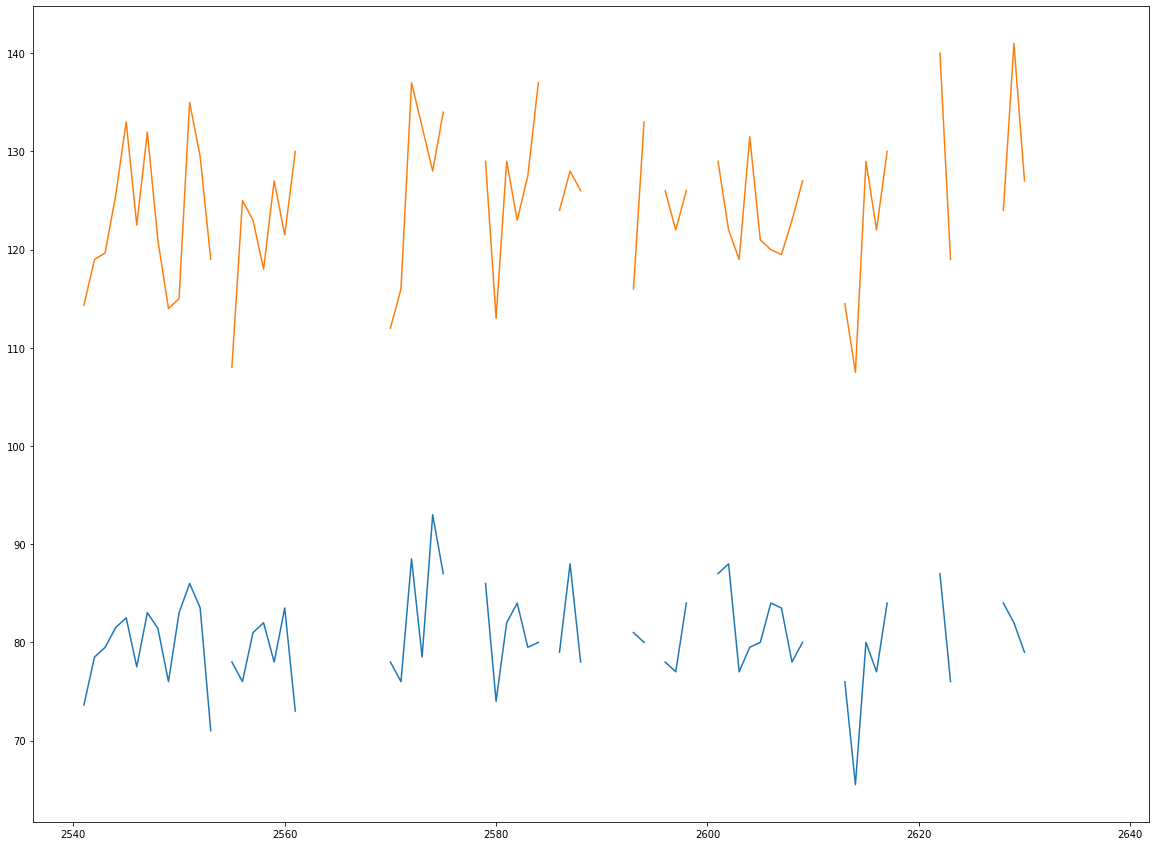

In [70]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average diastolic blood pressure (mmHg)'])
plt.plot(df.index, df['Average systolic blood pressure (mmHg)'])
plt.xlabel = 'None'
plt.show()


(100, 142.6794518027962)

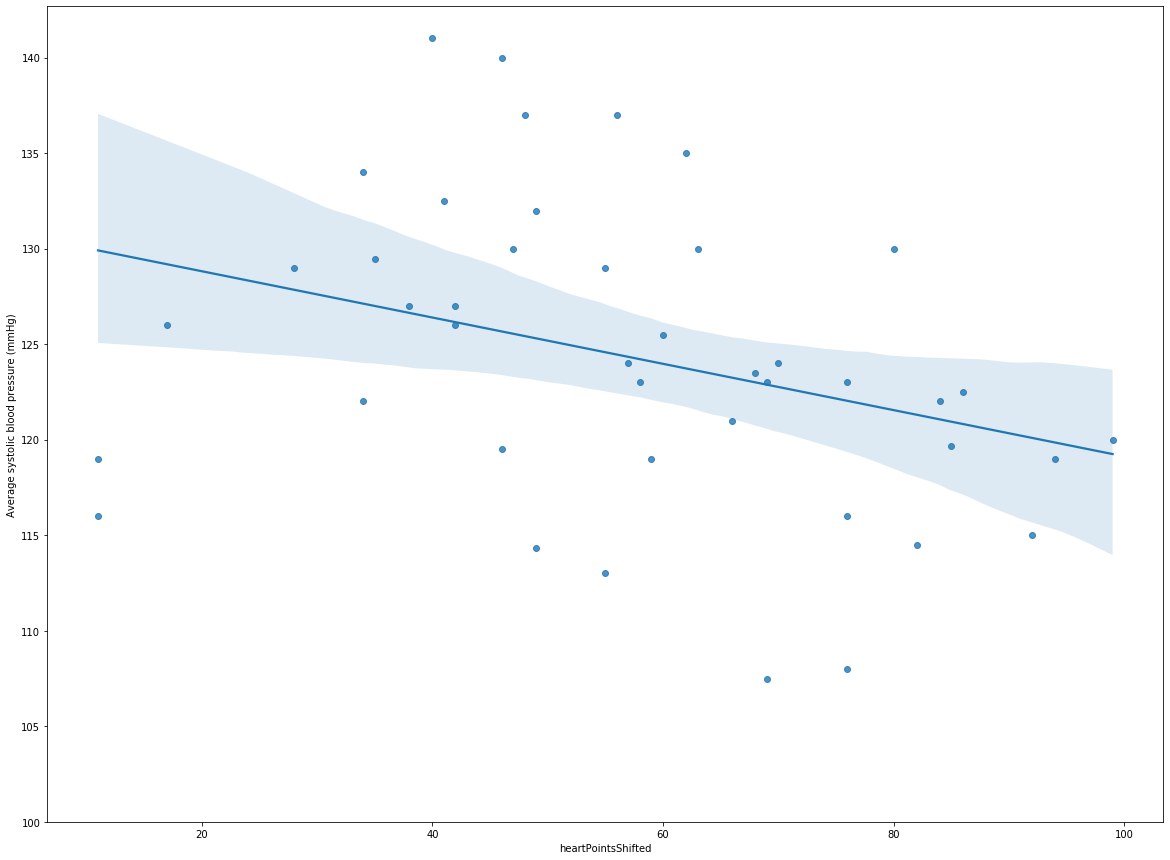

In [71]:
plt.figure(figsize=(20,15))
sns.regplot(x='heartPointsShifted', y='Average systolic blood pressure (mmHg)', data=df)
plt.ylim(100,)

## Glucose

In [72]:
filterForLabels(corr_fit_filtered, 'Average blood glucose (mmol/L)')

,Corr
rowingMachineMinutes,0.323917


In [73]:
bg = df['Average blood glucose (mmol/L)']
print('BG (mmol/L):', AverageFunction(bg, 1))
print('BG (mmg/dl):', round(AverageFunction(bg, 1) * 18))

BG (mmol/L): 7.6
BG (mmg/dl): 137


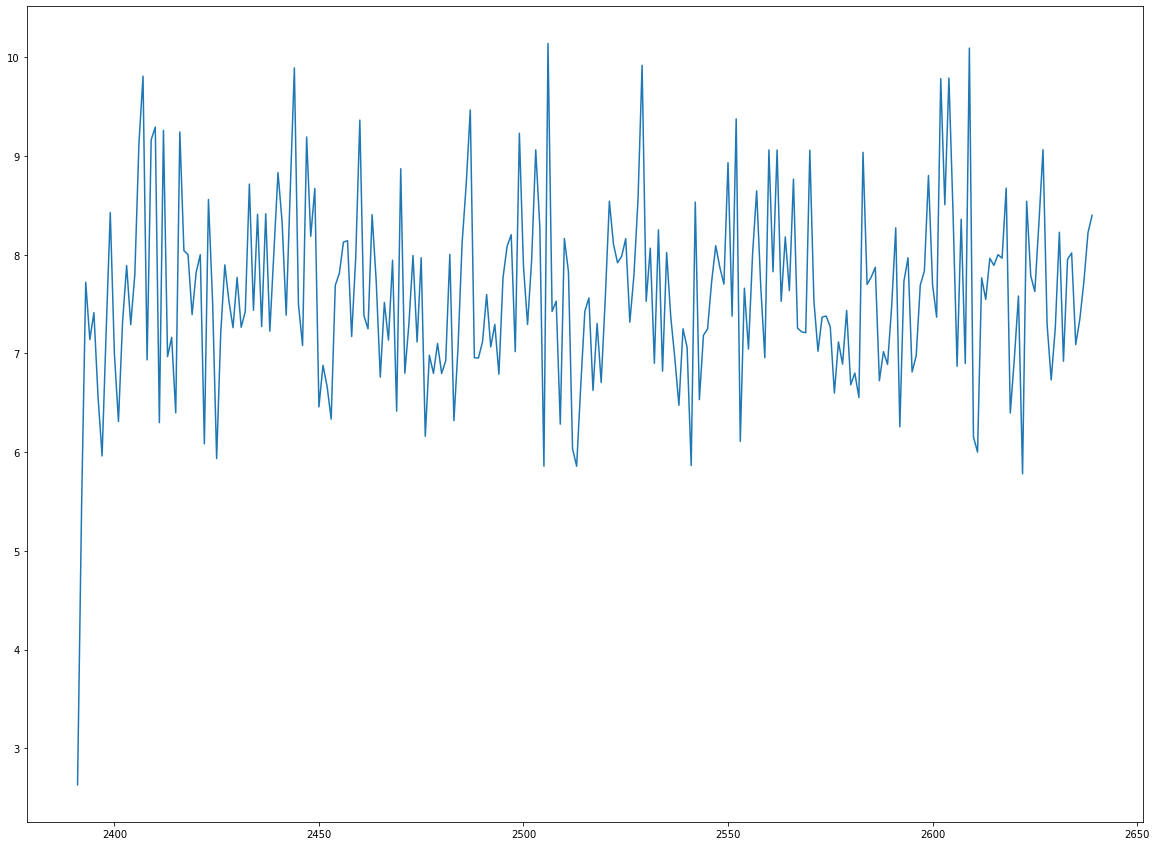

In [74]:
plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average blood glucose (mmol/L)'])
plt.show()

## Weight

In [75]:
filterForLabels(corr_fit_filtered, 'Average weight (kg)')

,Corr
rowingMachineMinutes,0.424734
rowingMachineMinutesShifted,0.412896


In [76]:
w = df['Average weight (kg)']
print('Weight (kg):', AverageFunction(w, 1))
print('Weight (lbs):', round(AverageFunction(w, 1) * 2.2,1))


Weight (kg): 101.3
Weight (lbs): 222.9


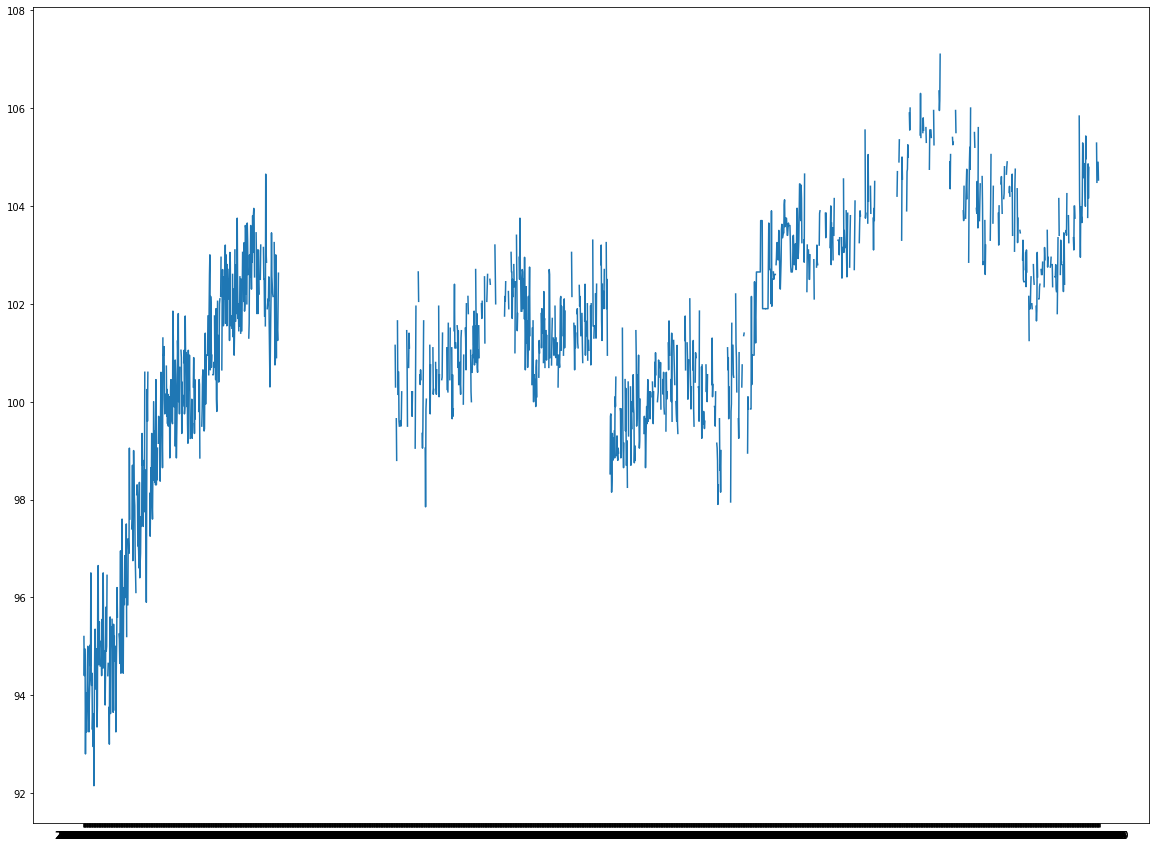

In [77]:
plt.figure(figsize=(20,15))
plt.plot(df['Date'], df['Average weight (kg)'])
plt.show()

## Sleep

In [78]:
filterForLabels(corr_fit_filtered, 'sleepSumHours')

,Corr
SleepSum,1.000000
basketballMinutes,-0.507087
Heart Points,0.308002
rowingMachineMinutesShifted,0.474206


In [79]:
print('Sleep:', AverageFunction(df['sleepSumHours'],2))
print('Sleep (Median):', MedianFunction(df['sleepSumHours'], 2))

Sleep: 6.52
Sleep (Median): 6.63


(10, 56.82108930279618)

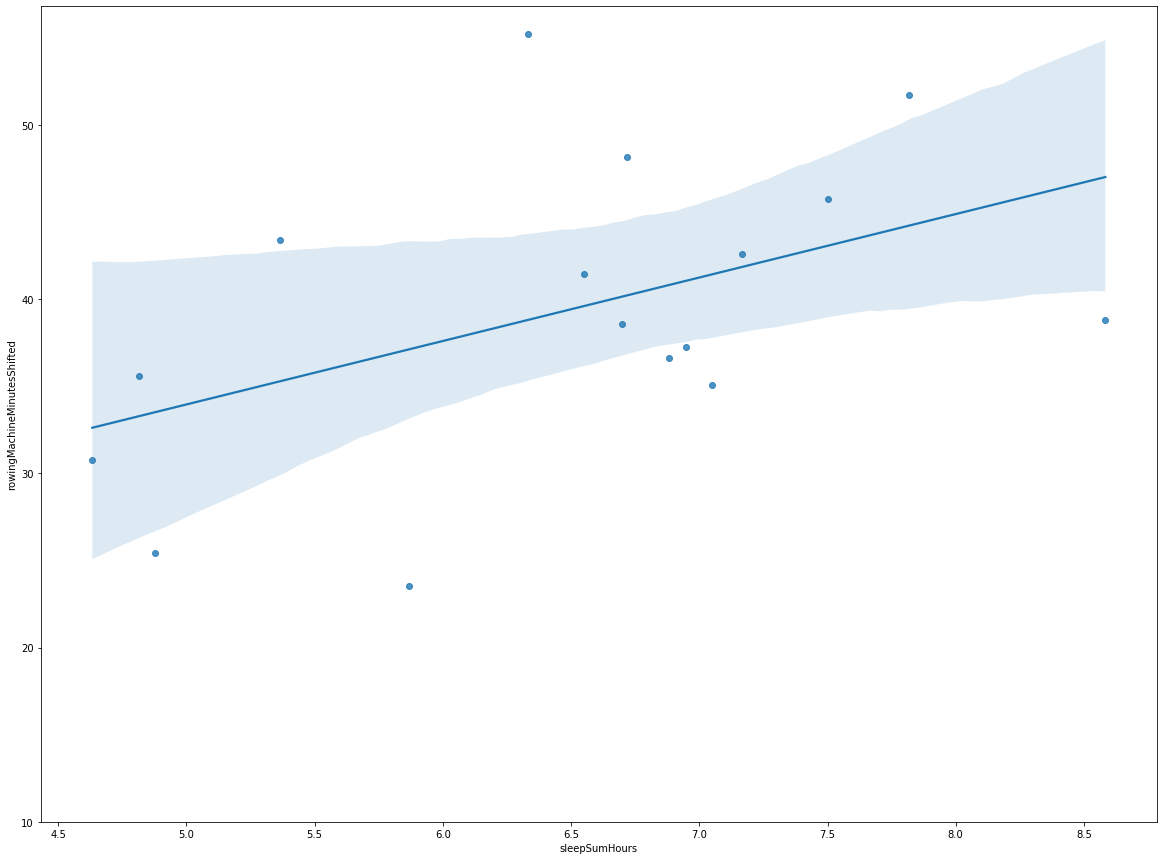

In [80]:
plt.figure(figsize=(20,15))
sns.regplot(x='sleepSumHours', y='rowingMachineMinutesShifted', data=df)
plt.ylim(10,)

## Activity

In [81]:
filterForLabels(corr_fit_filtered, 'distanceShifted')

,Corr
heartPointsShifted,0.469760
moveMinutesCountShifted,0.825532
basketballMinutes,0.425746


In [82]:
filterForLabels(corr_fit_filtered, 'rowingMachineMinutesShifted')

,Corr
Average weight (kg),0.412896
sleepSumHours,0.474206
moveMinutesCountShifted,0.625944
heartPointsShifted,0.773801
SleepSum,0.474206


In [83]:
filterForLabels(corr_fit_filtered, 'basketballMinutesShifted')

,Corr
moveMinutesCountShifted,0.302554
rowingMachineMinutes,0.321718
Heart Points,0.390390


In [84]:
filterForLabels(corr_fit_filtered, 'moveMinutesCountShifted')

,Corr
heartPointsShifted,0.771864
basketballMinutesShifted,0.302554
basketballMinutes,0.468222
rowingMachineMinutesShifted,0.625944
distanceShifted,0.825532


In [85]:
filterForLabels(corr_fit_filtered, 'heartPointsShifted')

,Corr
Average systolic blood pressure (mmHg),-0.331498
basketballMinutes,0.388935
distanceShifted,0.469760
moveMinutesCountShifted,0.771864
rowingMachineMinutesShifted,0.773801
